In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
import kaggle

kaggle.api.authenticate

kaggle.api.dataset_download_files("alyelbadry/house-pricing-dataset",path="./Data",unzip=True)

Dataset URL: https://www.kaggle.com/datasets/alyelbadry/house-pricing-dataset


In [100]:
files="./Data/house_prices.csv"
df=pd.read_csv(files)

In [101]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [103]:
df.drop(["id","date","yr_built","yr_renovated","zipcode","lat","long","view"],axis=1,inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  object 
 7   condition      21613 non-null  object 
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  sqft_living15  21613 non-null  int64  
 12  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 2.1+ MB


In [105]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,7.656873,1788.390691,291.509045,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,1.175459,828.090978,442.575043,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


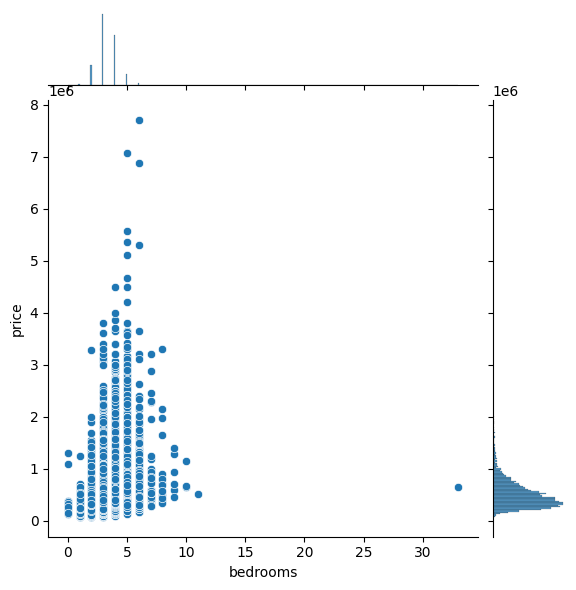

In [106]:
sns.jointplot(x="bedrooms",y="price",data=df)

In [119]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mmscaler=MinMaxScaler()
ssscaler=StandardScaler()
price=mmscaler.fit_transform(df[["price"]])

In [120]:
df["price"]=price

<Axes: >

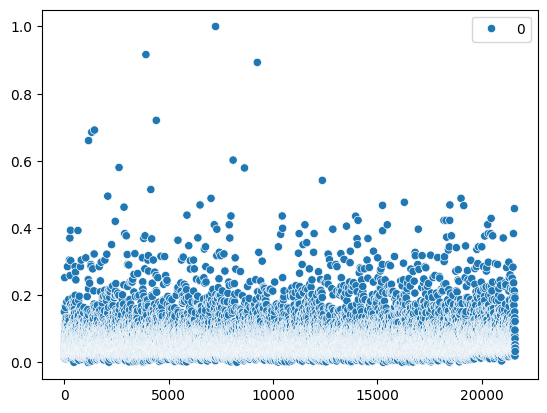

In [121]:
sns.scatterplot(price)

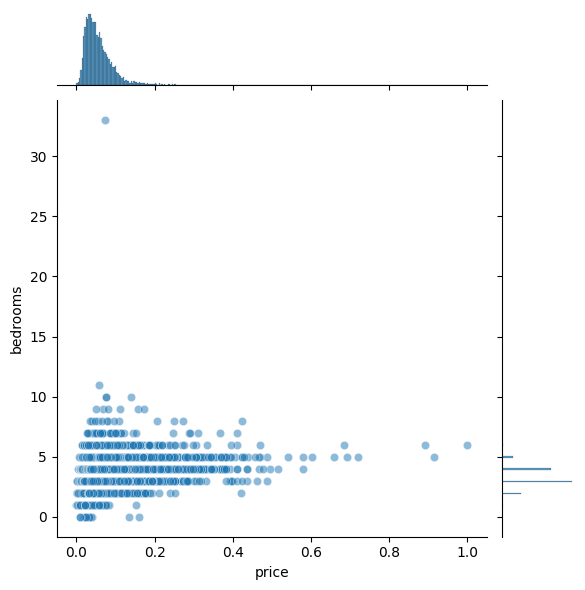

In [122]:
sns.jointplot(x="price",y="bedrooms",data=df,alpha=0.5)

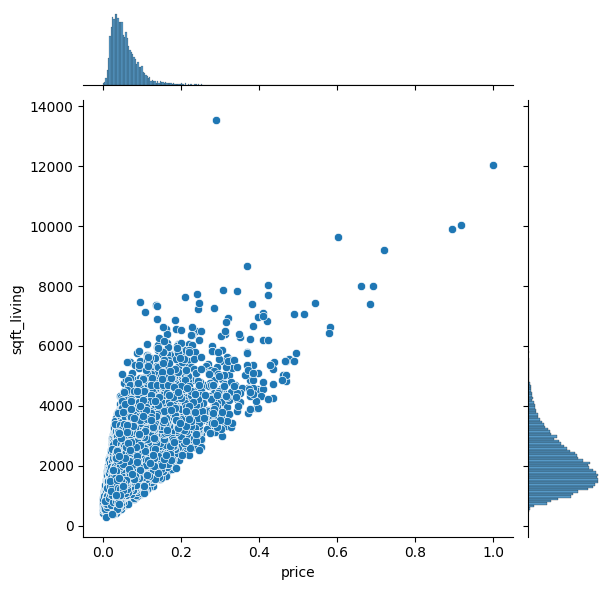

In [123]:
sns.jointplot(x="price",y="sqft_living", data=df)

In [124]:
df["price"]

0        0.019266
1        0.060721
2        0.013770
3        0.069377
4        0.057049
           ...   
21608    0.037377
21609    0.042623
21610    0.042898
21611    0.042623
21612    0.032787
Name: price, Length: 21613, dtype: float64

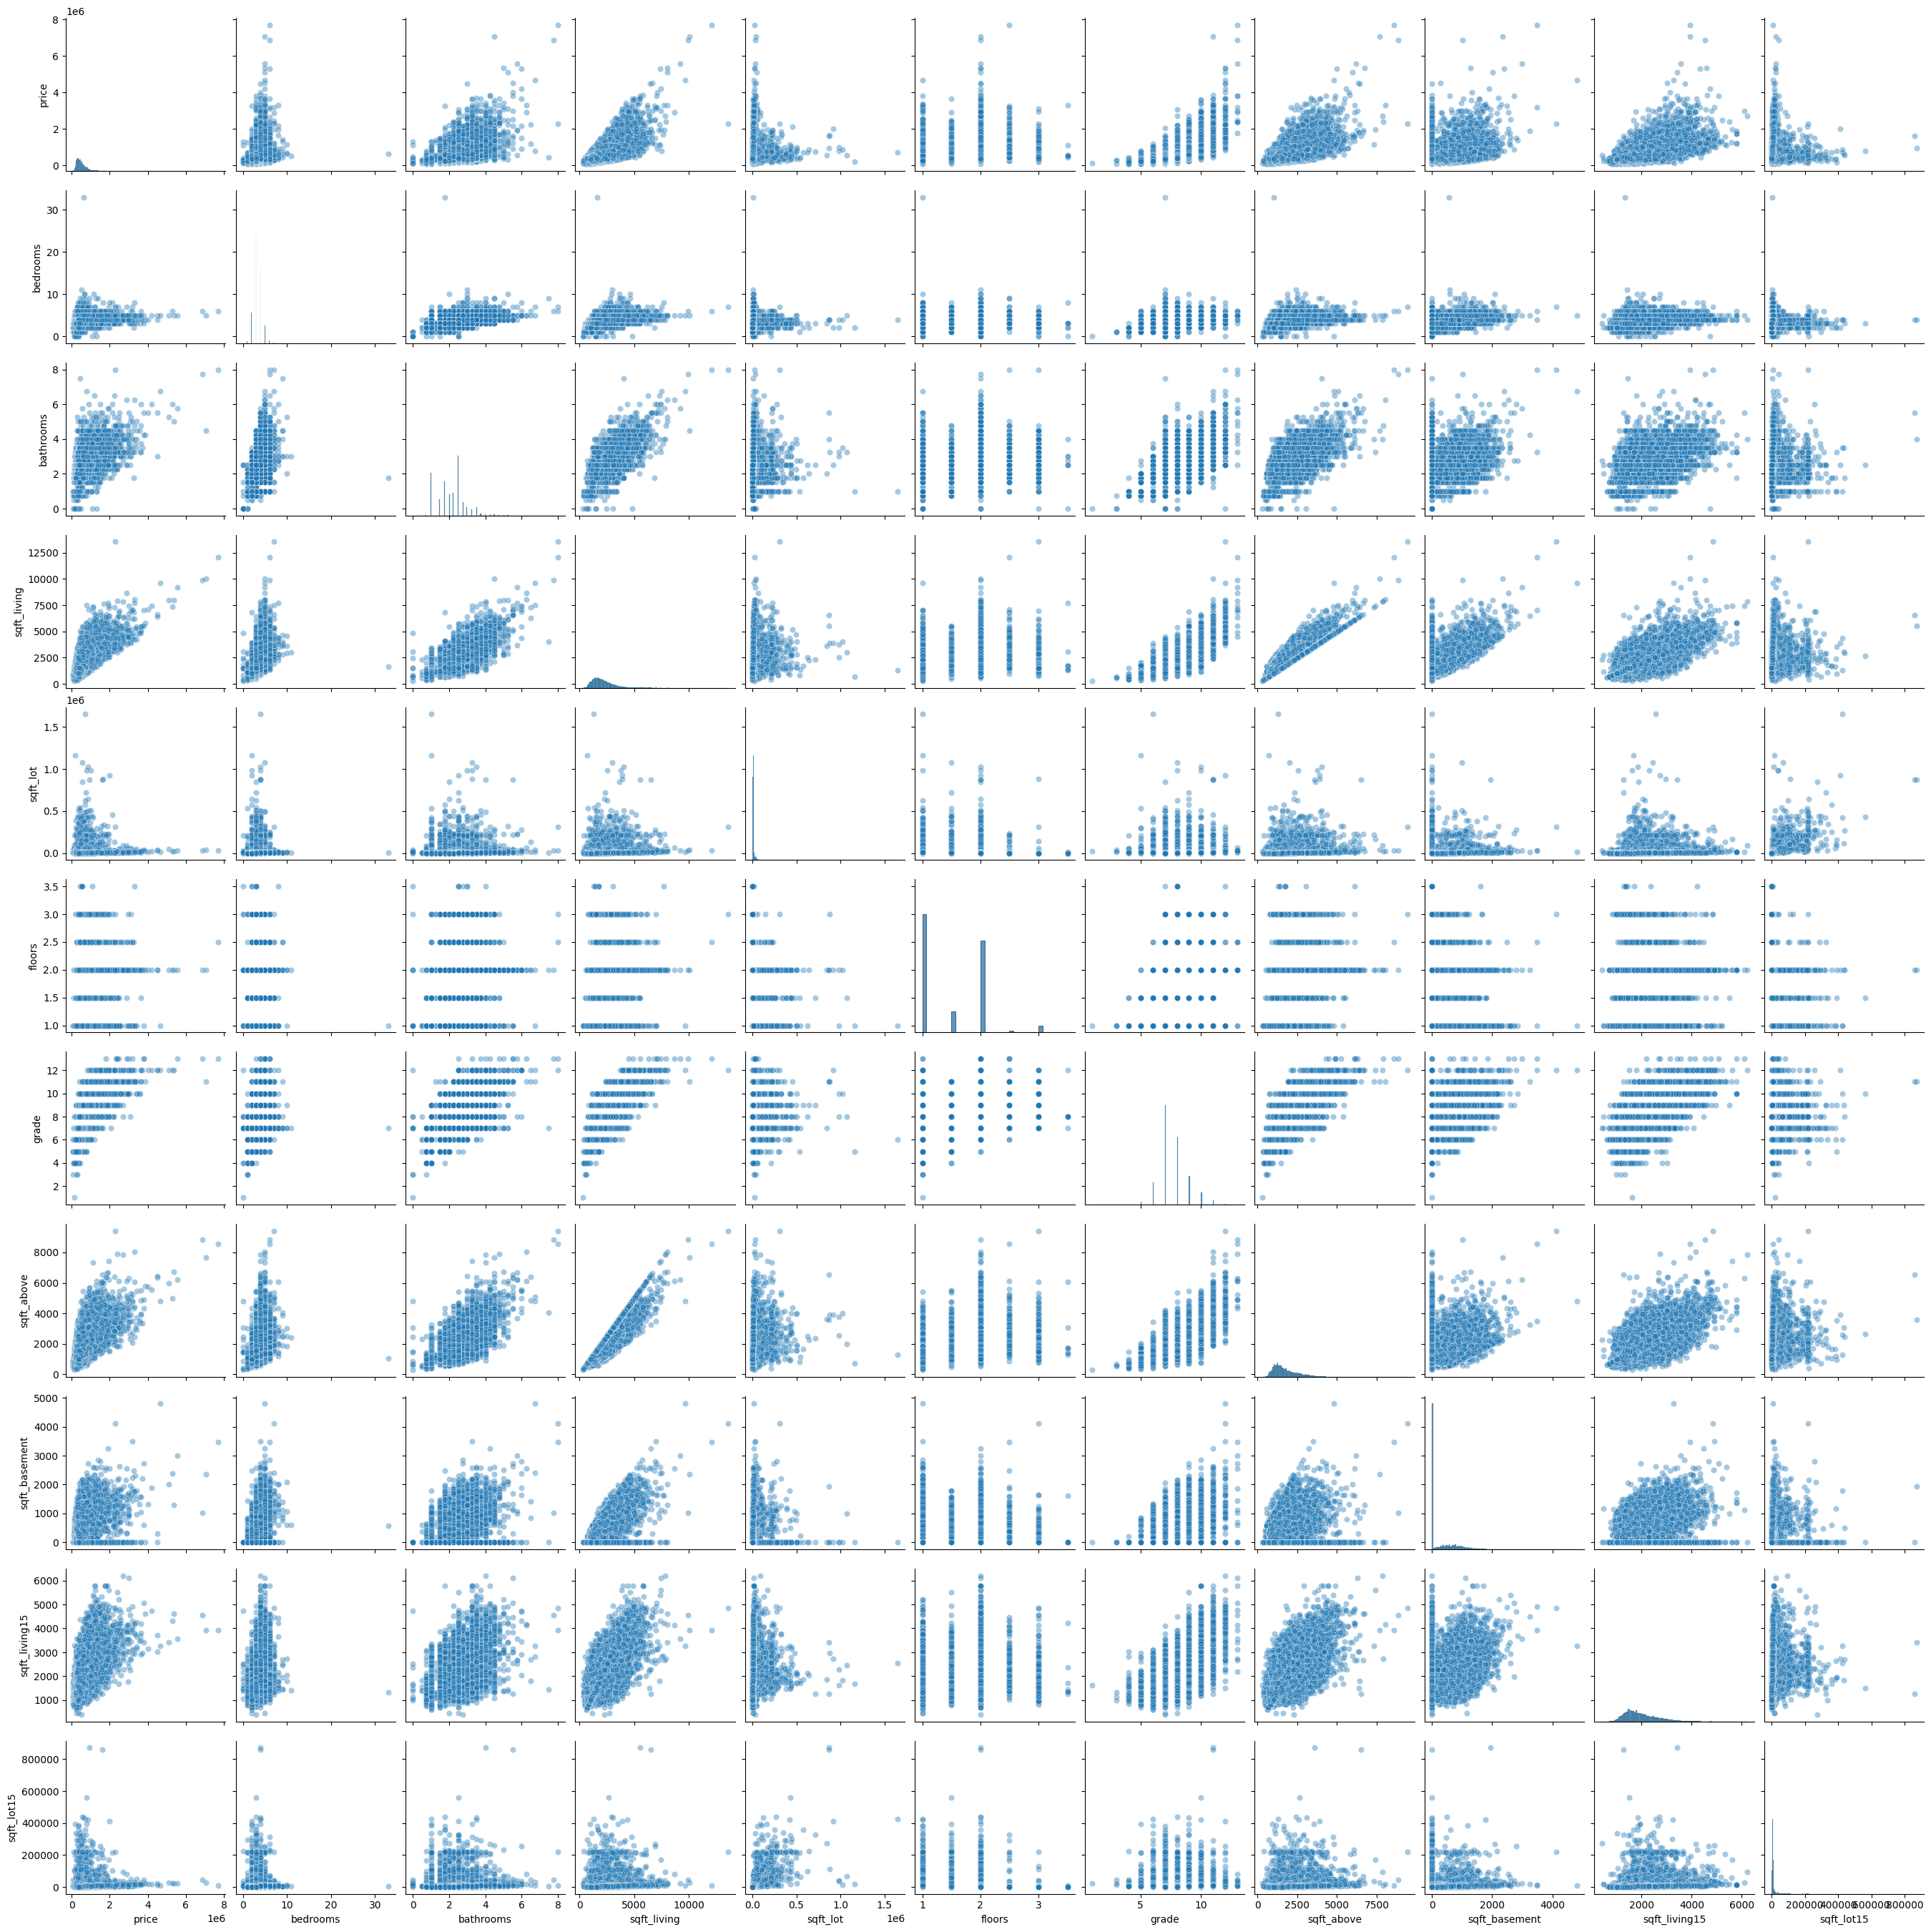

In [110]:
sns.pairplot(df,kind="scatter",plot_kws={'alpha':0.4})

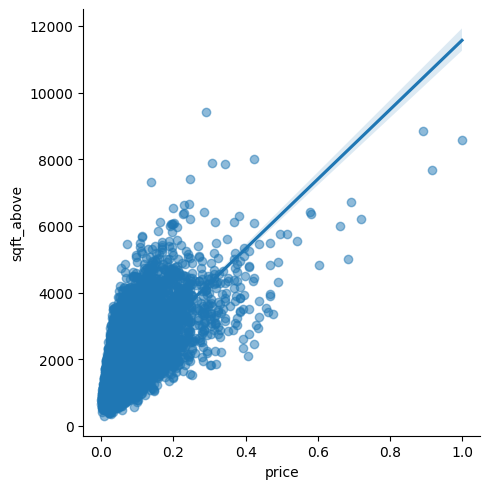

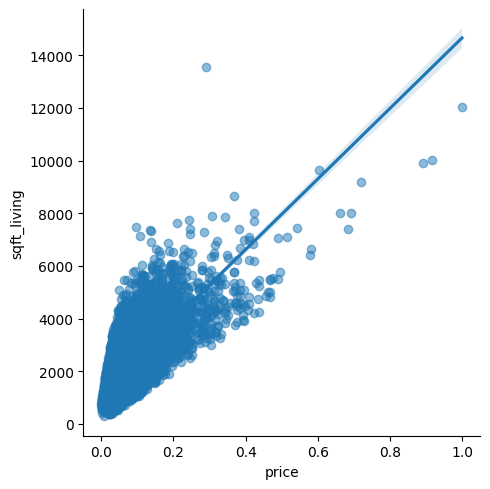

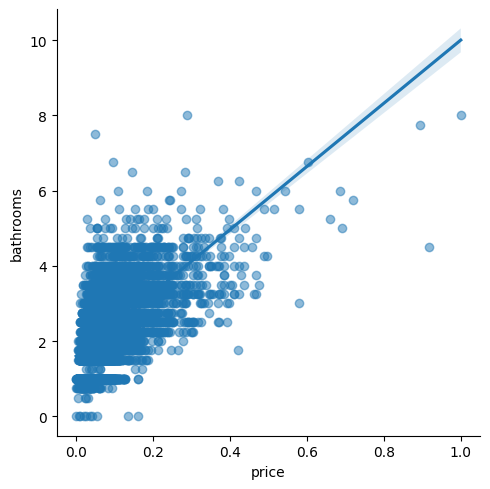

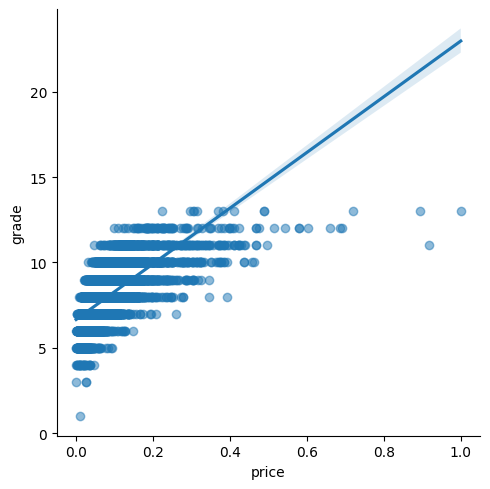

In [125]:
sns.lmplot(x="price",y="sqft_above",data=df,scatter_kws={"alpha":0.5})
sns.lmplot(x="price",y="sqft_living",data=df,scatter_kws={"alpha":0.5})
sns.lmplot(x="price",y="bathrooms",data=df,scatter_kws={"alpha":0.5})
sns.lmplot(x="price",y="grade",data=df,scatter_kws={"alpha":0.5})

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [127]:
X=df[["sqft_living","sqft_above","grade","bathrooms"]]
X_scaled=mmscaler.fit_transform(X)
X_scaled
y=df["price"]

In [128]:
model=LinearRegression()
X_trian,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [129]:
model.fit(X_trian,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [130]:
model.coef_

array([ 0.43885089, -0.09076957,  0.17621684, -0.03726396])

In [131]:
y_pred=model.predict(X_test)

In [132]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nR2 Score: {r2score}")
import math
print("RSME: ",math.sqrt(mse))


Mean Squared Error: 0.001149957698053127
Mean Absolute Error: 0.021663224414944126
R2 Score: 0.5368783986897976
RSME:  0.03391102620171096


In [136]:
data=[[5000,4000,10,4]]
model.predict(mmscaler.fit_transform(data))

array([-0.07137118])